In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 300
import matplotlib.pyplot as plt

import exact

In [2]:
def p(h_0, x_0, v_0, alpha, g):
    return np.cos(alpha)*v_0*(v_0*np.sin(alpha)+ np.sqrt((v_0*np.sin(alpha))**2+2*g*h_0))/g +x_0


In [3]:
def trapezoidal_integration(f, N):
    """
    Integrates f from a to b using trapezoidal trapezoidal
    """
    x, dx = np.linspace(0, 1, N, retstep=True)
    return (f(x[0]) + 2*np.sum(f(x[1:-1])) + f(x[-1])) * dx / 2


In [4]:
x_0 = 0.2
v_0 = 20
alpha = np.pi/8.0

N = 500

g = 9.81


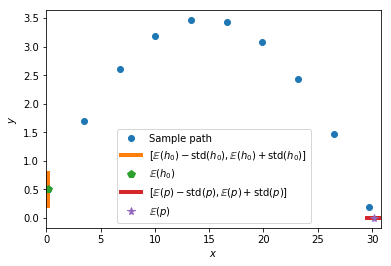

In [8]:
# First plot a sample path
t = np.linspace(0, 1.6, 10)
plt.plot(x_0 + np.cos(alpha)*v_0*t, 0.5 + np.sin(alpha)*v_0*t-0.5*g*t**2, 'o', label='Sample path')


# Plot the different height possibilities
plt.plot([x_0, x_0], [0.5-np.sqrt(1.0/12.0), 0.5+np.sqrt(1.0/12.0)],
    linewidth=4, label='$[\\mathbb{E}(h_0)-\\mathrm{std}(h_0), \\mathbb{E}(h_0)+\\mathrm{std}(h_0)]$')

plt.plot(x_0, 0.5, 'p', markersize=8, label='$\\mathbb{E}(h_0)$')



mean = trapezoidal_integration(lambda h_0: p(h_0, x_0, v_0, alpha, g), N)

variance = trapezoidal_integration(lambda h_0: (p(h_0, x_0, v_0, alpha, g)-mean)**2, N)
std = np.sqrt(variance)
plt.plot([mean - std, mean+std], [0, 0], linewidth=4,
    label='$[\\mathbb{E}(p)-\\mathrm{std}(p), \\mathbb{E}(p)+\\mathrm{std}(p)]$')
plt.plot([mean], [0], '*', markersize=8, label='$\\mathbb{E}(p)$')
plt.legend()
plt.xlim([0, mean+std])

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.savefig('uncertain_height.png')

plt.show()


# Convergence plots

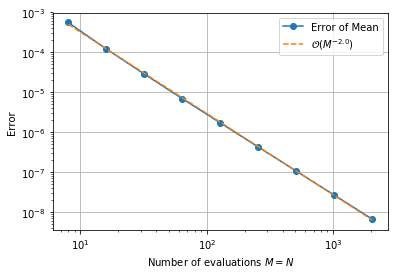

In [6]:


resolutions = 2**np.arange(3, 12)

errors_mean = []


for resolution in resolutions:
    mean = trapezoidal_integration(lambda h_0: p(h_0, x_0, v_0, alpha, g), resolution)
    mean_exact = exact.integral_mean_p(x_0, v_0, alpha, g)
    errors_mean.append(np.abs(mean-mean_exact))
errors_mean = np.array(errors_mean, dtype=np.float64)

plt.loglog(resolutions, errors_mean, '-o', label='Error of Mean')
fitted = np.polyfit(np.log(resolutions), np.log(errors_mean), 1)
plt.loglog(resolutions, np.exp(fitted[1])*resolutions**fitted[0], '--',
    label='$\\mathcal{{O}}(M^{{{:.1f}}})$'.format(fitted[0]))
plt.xlabel('Number of evaluations $M=N$ ')
plt.ylabel("Error")
plt.grid(True)
plt.legend()
plt.savefig('uncertain_height_convergence.png')
plt.show()
